<a href="https://colab.research.google.com/github/shanky474/pfizer_case_study_customer_churn/blob/main/Customer_Churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Packages**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#**Read churn data in csv**

In [3]:
df = pd.read_csv(r'drive/MyDrive/Pfizer_Assessment/Telco-Customer-Churn.csv',index_col=None)

# **Profile the data for nulls and duplicates**

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [7]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


##### No Nulls or duplicates present in data

# **Exploratory data analysis**

##### Dropping customerID colum as it doesn't contribute to correlations or predictions owing to it's very high cardinality.

In [8]:
df_fine_tune = df.drop(['customerID'], axis = 1)

In [9]:
df_fine_tune.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Identify all categorical feature columns on the basis of following observations:
##### 1. All categorical columns contain discreet categorical values rather than continuous numerical values.
##### 2. We have identified columns SeniorCitizen, Partner,	Dependents,	PhoneService,	MultipleLines,	InternetService,	OnlineSecurity,	OnlineBackup,	DeviceProtection,	TechSupport,	StreamingTV,	StreamingMovies,	Contract,	PaperlessBilling,	PaymentMethod so we would be using One Hot encoding to convert it to binary 0 and 1 (SeniorCitizen is already in 0 and 1).
##### 3. We have identified churn output column as categorical too hence we would be converting it to binary 0 and 1.  

In [10]:
df_fine_tune['Churn']=df_fine_tune['Churn'].map({"Yes":1,"No":0})
df_fine_tune_encoded = pd.get_dummies(df_fine_tune, columns=['gender',
                                                             'Partner',
                                                             'Dependents',
                                                             'PhoneService',
                                                             'MultipleLines',
                                                             'InternetService',
                                                             'OnlineSecurity',
                                                             'OnlineBackup',
                                                             'DeviceProtection',
                                                             'TechSupport',
                                                             'StreamingTV',
                                                             'StreamingMovies',
                                                             'Contract',
                                                             'PaperlessBilling',
                                                             'PaymentMethod'],drop_first=False,dtype='int')
df_fine_tune_encoded.columns = df_fine_tune_encoded.columns.str.replace(' ', '_')

In [11]:
df_fine_tune_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   object 
 4   Churn                                    7043 non-null   int64  
 5   gender_Female                            7043 non-null   int64  
 6   gender_Male                              7043 non-null   int64  
 7   Partner_No                               7043 non-null   int64  
 8   Partner_Yes                              7043 non-null   int64  
 9   Dependents_No                            7043 non-null   int64  
 10  Dependents_Yes                           7043 no

###### Validate all numeric columns for consistency and correctness

In [12]:
df_fine_tune_numeric = df_fine_tune_encoded[['tenure','MonthlyCharges','TotalCharges']].apply(pd.to_numeric,errors='coerce')
df_fine_tune_numeric.isnull().sum()

,0
tenure,0
MonthlyCharges,0
TotalCharges,11


###### We see that total charges has some values which are numerically inconsistent. Let see those values

In [13]:
df_fine_tune_numeric[np.isnan(df_fine_tune_numeric['TotalCharges'])]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


##### Also we see that the tenure values are zero hence we can drop these rows. It doesn't impact the overall dataset owing to infinitesimally small percentage (11/7043)*100 ~ 0.15%

In [14]:
df_fine_tune_encoded.drop(labels=df_fine_tune_numeric[df_fine_tune_numeric['tenure'] == 0].index, axis=0, inplace=True)

In [15]:
df_fine_tune_encoded[['TotalCharges']] = df_fine_tune_encoded[['TotalCharges']].apply(pd.to_numeric, errors='coerce')

In [16]:
df_fine_tune_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


##### Generate correlation plots

<Axes: >

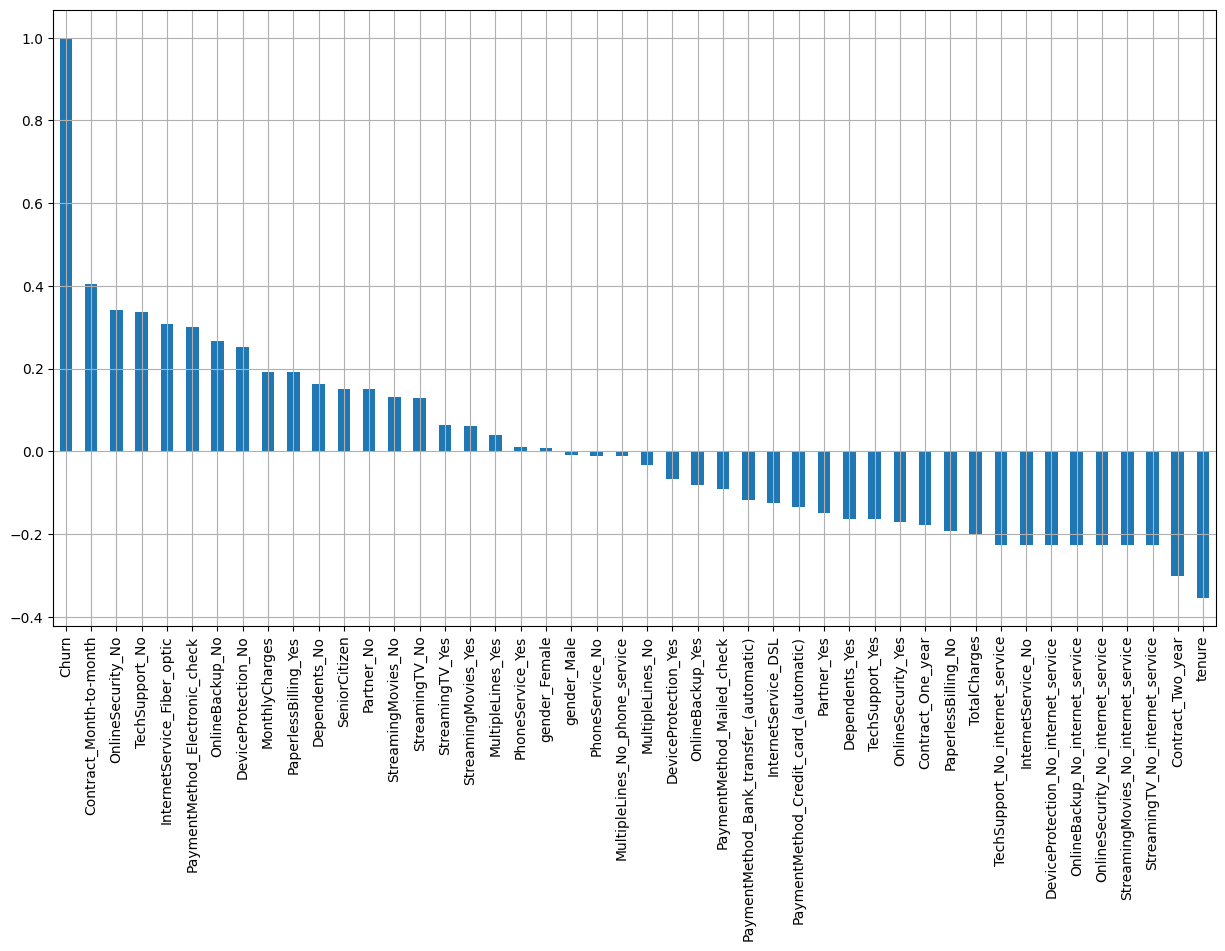

In [17]:
plt.figure(figsize=(15,8))
df_fine_tune_encoded.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',grid=True)

##### We see quite a few intersting observations:

 *   Contracts on a month to month basis, no online_security, no tech support are directly proportional to churn. Month to month contracts, absence of online security and tech support seem to be positively correlated with churn.
 *  Tenure, two year contracts, Online security, streaming TV, online backup, tech support  without internet connection are inversely proportional to churn.
*  Next We would explore individual categorical variables in details.

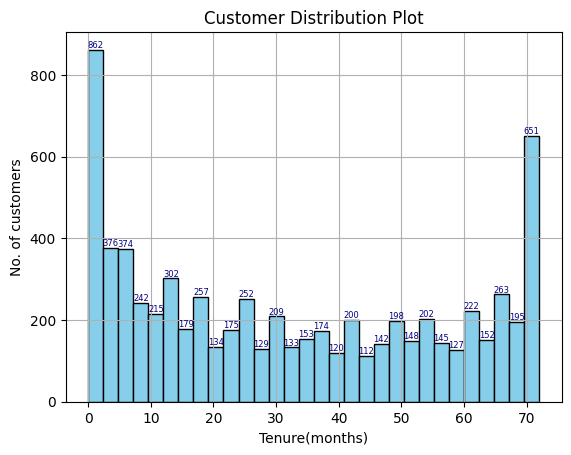

In [18]:
# For Tenure
counts, bins, bars= plt.hist(df_fine_tune['tenure'], bins=30, color='skyblue', edgecolor='black')
plt.bar_label(bars, fontsize=6, color='navy')
plt.xlabel('Tenure(months)')
plt.ylabel('No. of customers')
plt.title('Customer Distribution Plot')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Number of Customers')

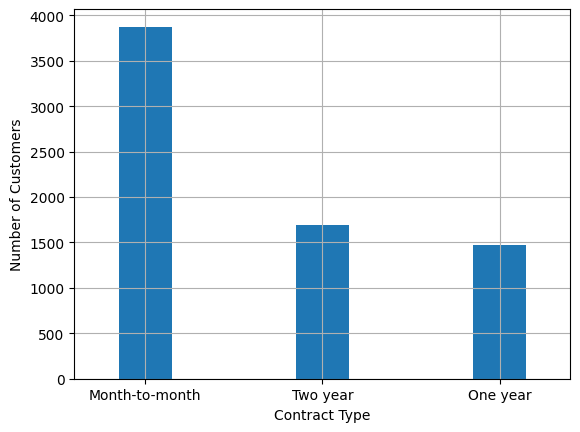

In [19]:
# For Contract
ax = df_fine_tune['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, grid=True)
ax.set_xlabel('Contract Type')
ax.set_ylabel('Number of Customers')

##### We see that the customers distribution is relatively higher for just little over a month as well as for 70 months. Given that it could be due to contract durations, we see that distribution is more than twice for a month to month contract than two year or one year contract type. Hence it's imperative to explore relationships between them.

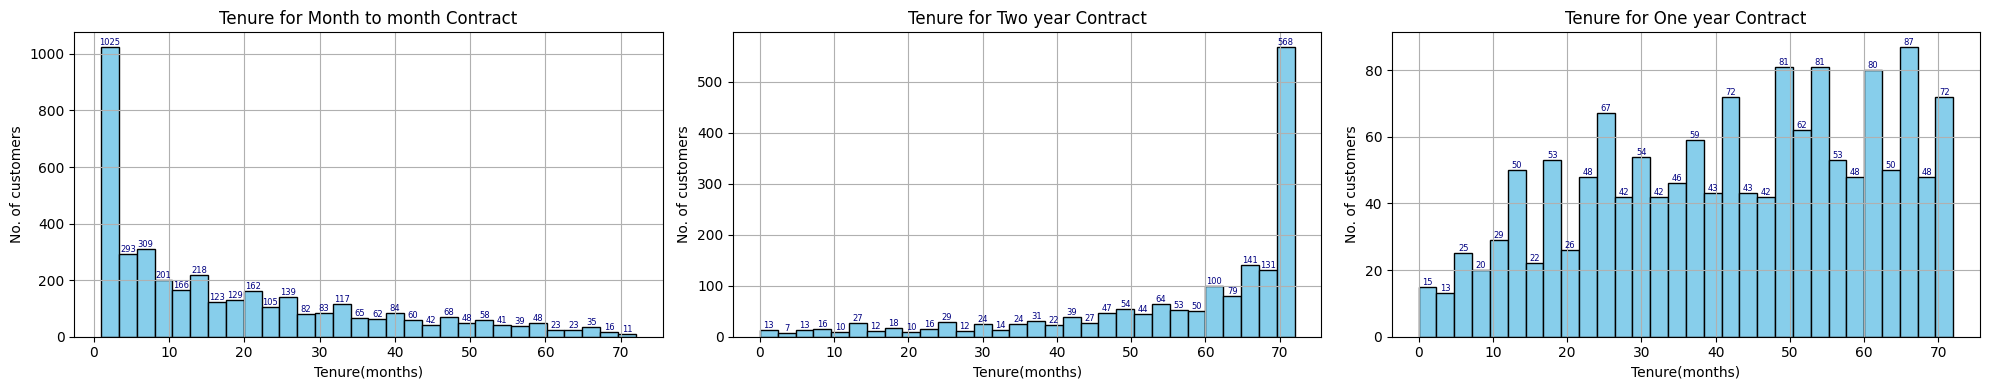

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))

# Plot Customer Tenure distribution for month to month Contract
counts, bins, bars= ax1.hist(df_fine_tune[df_fine_tune['Contract']=='Month-to-month']['tenure'], bins=30, color='skyblue', edgecolor='black')
ax1.bar_label(bars, fontsize=6, color='navy')
ax1.set_xlabel('Tenure(months)')
ax1.set_ylabel('No. of customers')
ax1.set_title('Tenure for Month to month Contract')
ax1.grid(True)

# Plot Customer Tenure distribution for Two Year Contract
counts, bins, bars= ax2.hist(df_fine_tune[df_fine_tune['Contract']=='Two year']['tenure'], bins=30, color='skyblue', edgecolor='black')
ax2.bar_label(bars, fontsize=6, color='navy')
ax2.set_xlabel('Tenure(months)')
ax2.set_ylabel('No. of customers')
ax2.set_title('Tenure for Two year Contract')
ax2.grid(True)

# Plot Customer Tenure distribution for One Year Contract
counts, bins, bars= ax3.hist(df_fine_tune[df_fine_tune['Contract']=='One year']['tenure'], bins=30, color='skyblue', edgecolor='black')
ax3.bar_label(bars, fontsize=6, color='navy')
ax3.set_xlabel('Tenure(months)')
ax3.set_ylabel('No. of customers')
ax3.set_title('Tenure for One year Contract')
ax3.grid(True)



plt.tight_layout() # Adjust subplot params for tight layout
plt.show()

##### Month-to-month contracts last for 1-2 months, but 2 year contracts last for 70 months. This shows that the customers opting for longer contracts with the company stay with it for a longer period of time which is inline with what we saw in earlier chart on correlation with the churn rate. Let's look at other variables.

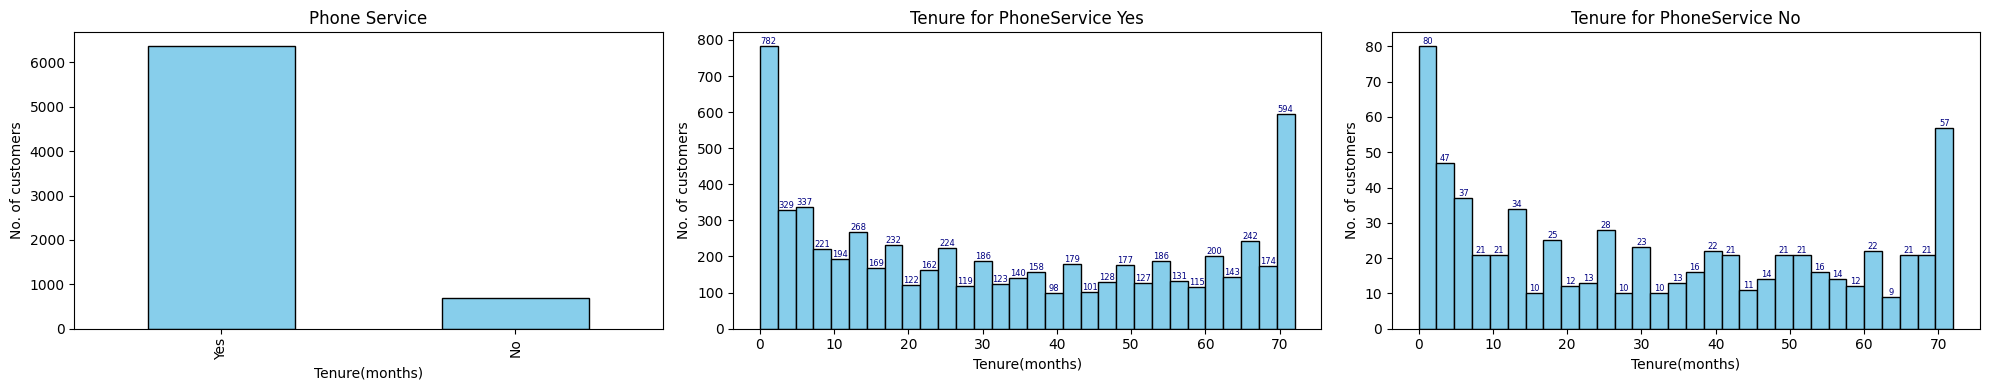

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

axaxs.flatten()

for i, data in enumerate(data_list):
  # Plot categorial frequency for Phone Service
  df_fine_tune['PhoneService'].value_counts().plot(kind='bar',color='skyblue', ax=ax1,edgecolor='black')
  ax1.set_xlabel('Tenure(months)')
  ax1.set_ylabel('No. of customers')
  ax1.set_title('Phone Service')


  # Plot Customer Tenure distribution for month to month Contract
  counts, bins, bars= ax2.hist(df_fine_tune[df_fine_tune['PhoneService']=='Yes']['tenure'], bins=30, color='skyblue', edgecolor='black')
  ax2.bar_label(bars, fontsize=6, color='navy')
  ax2.set_xlabel('Tenure(months)')
  ax2.set_ylabel('No. of customers')
  ax2.set_title('Tenure for PhoneService Yes')


  # Plot Customer Tenure distribution for Two Year Contract
  counts, bins, bars= ax3.hist(df_fine_tune[df_fine_tune['PhoneService']=='No']['tenure'], bins=30, color='skyblue', edgecolor='black')
  ax3.bar_label(bars, fontsize=6, color='navy')
  ax3.set_xlabel('Tenure(months)')
  ax3.set_ylabel('No. of customers')
  ax3.set_title('Tenure for PhoneService No')


plt.tight_layout() # Adjust subplot params for tight layout
plt.show()